In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
plt.style.use('seaborn')
path = './healthcare-dataset-stroke-data.csv'

## Read data function
def read_data(path):
    df = pd.read_csv(path)
    df = df.dropna(axis = 0)
    return df

In [4]:
df = read_data(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


(array([2.011e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.897e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

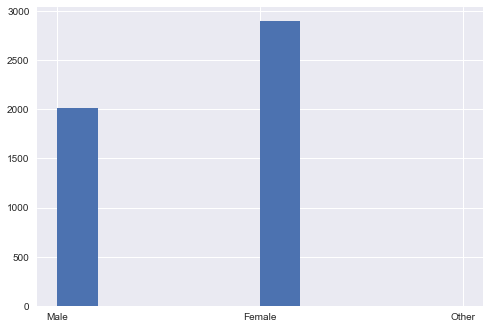

In [5]:
plt.hist(df['gender'])

In [6]:
def plot_categorical(df,features):
    n_plots = len(features)
    fig,axs = plt.subplots(n_plots, 1,figsize = (n_plots * 3, n_plots * 4))
    for i,ax in enumerate(axs.flatten()):
        newdf = df[features[i]]
        ax.hist(newdf)
        ax.set_title(f'Distribution of {features[i]}', size = 20)
        ax.tick_params(axis='both', labelsize=15)## increase font size of both axis labels.
    fig.tight_layout() ## increases spacing between multiple plots

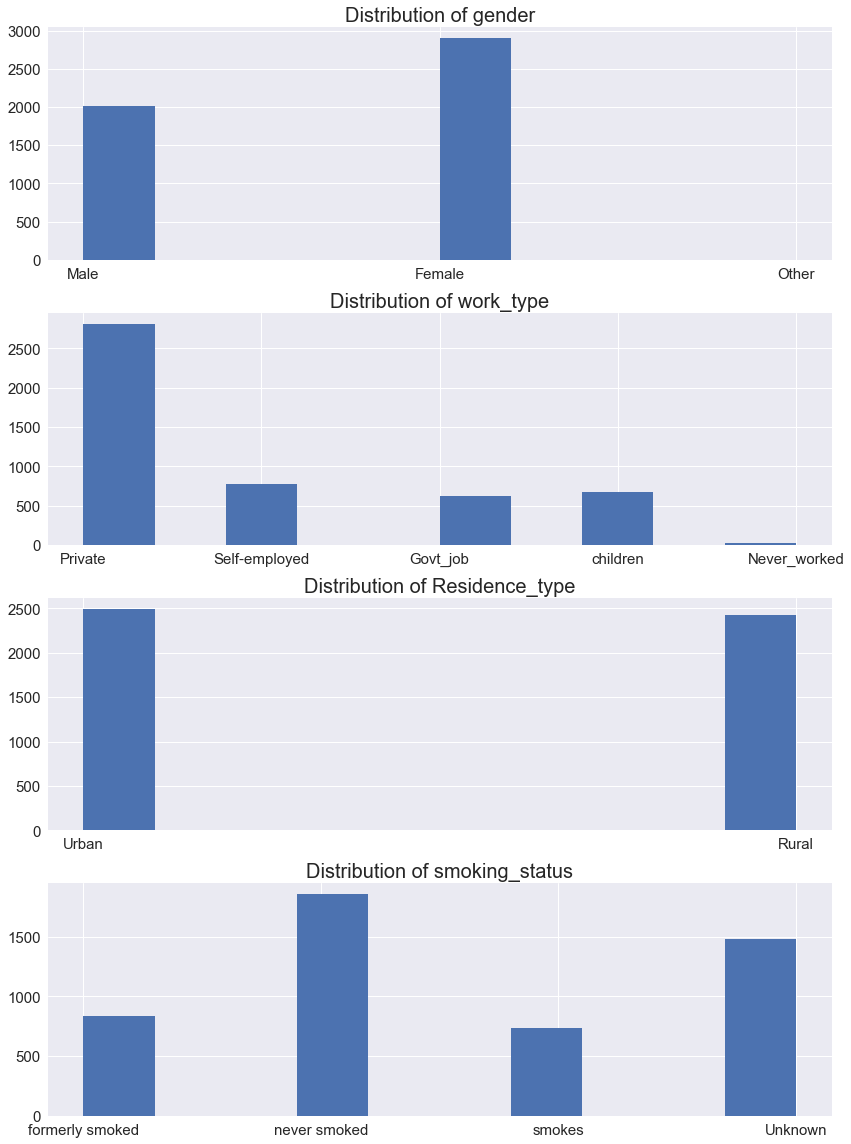

In [7]:
features= ['gender','work_type','Residence_type','smoking_status']
plot_categorical(df,features)

In [28]:

def plot_numerical(df,num_features):
    n_plots = len(features)
    fig,axs = plt.subplots(n_plots, 1, figsize = (n_plots *4, n_plots * 5))
    for i,val in enumerate(axs.flatten()):
        newdf = df[features[i]]
        sns.set(font_scale = 2.4)
        sns.histplot(newdf,ax = axs[i],kde = True, alpha = 0.4, color="teal")
    fig.tight_layout()

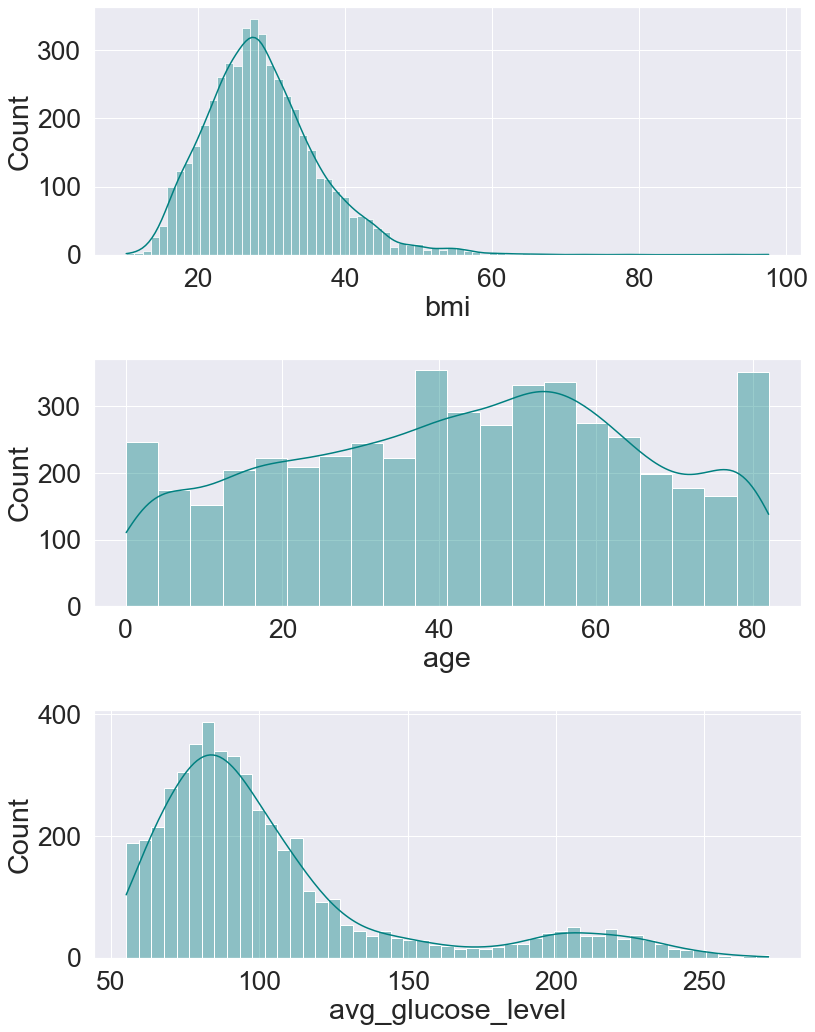

In [29]:
features = ['bmi','age','avg_glucose_level']
plot_numerical(df,features)

In [10]:
df.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [11]:
def plot_binary(df,bin_features):
    n_plots = len(features)
    fig,axs = plt.subplots(n_plots, 1, figsize = (n_plots *4, n_plots * 5))
    for i,val in enumerate(axs.flatten()):
        newdf = df[features[i]]
        sns.set(font_scale = 2.4)
        sns.countplot(newdf,ax = axs[i], alpha = 0.4 )
    fig.tight_layout()

/anaconda3/envs/DSI/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

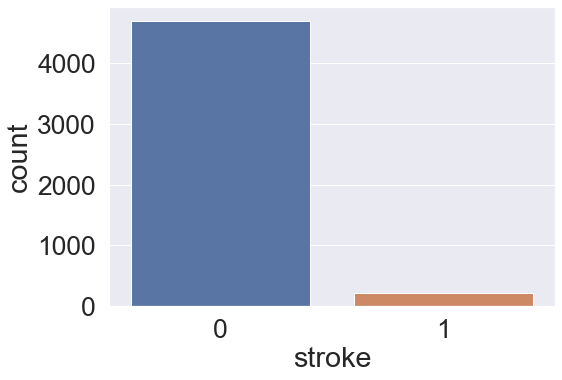

In [12]:
sns.countplot(df['stroke'],data = df)

/anaconda3/envs/DSI/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/anaconda3/envs/DSI/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


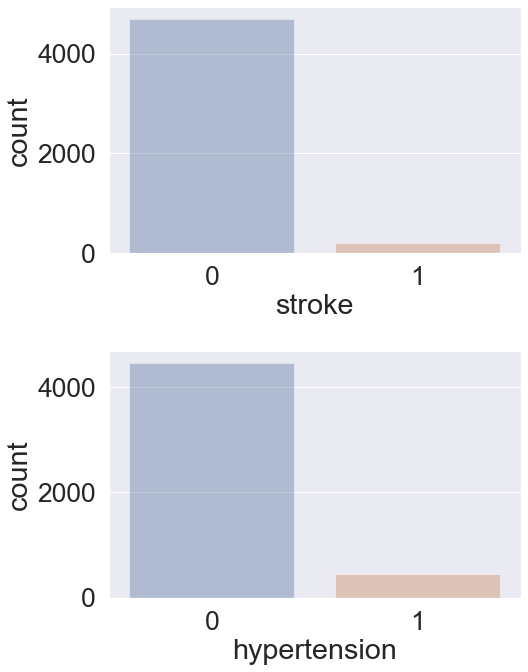

In [13]:
features = ['stroke','hypertension']
plot_binary(df,features)

$$ \frac{\sum x} {p} $$

## Does having higher BMI associated with stroke?

In [14]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [15]:
df_nonstroke = df[df['stroke']==0]
df_stroke = df[df['stroke']==1]

In [16]:
stats.ttest_ind(df_stroke['bmi'],df_nonstroke['bmi'])

Ttest_indResult(statistic=2.9709426097788083, pvalue=0.0029832690997420824)

In [17]:
df_stroke['bmi']

0      36.6
2      32.5
3      34.4
4      24.0
5      29.0
       ... 
243    40.5
244    36.7
245    30.9
246    29.3
248    19.6
Name: bmi, Length: 209, dtype: float64

In [18]:
#!pip install statannot


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0 v.s. 1: t-test independent samples with Bonferroni correction, P_val=2.983e-03 stat=-2.971e+00


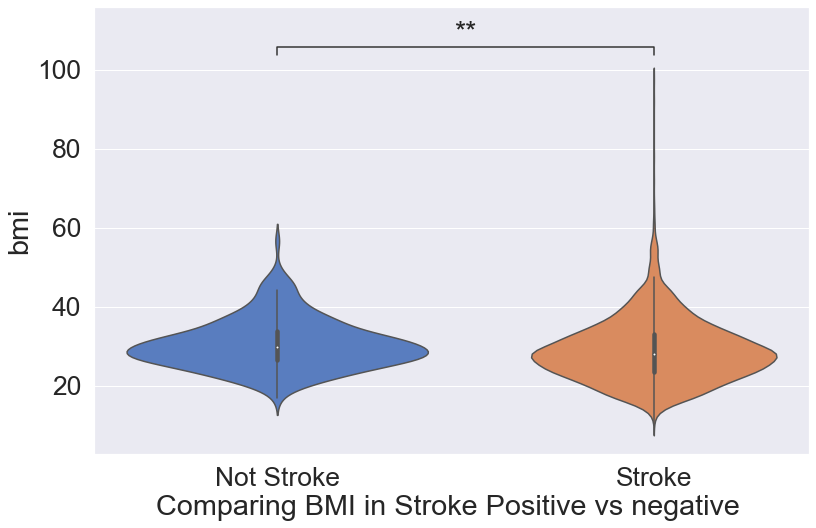

In [19]:
from statannot import add_stat_annotation
fig,ax = plt.subplots(figsize = (12,8))
## convert to category
df["stroke_"]= df["stroke"].astype(str)
sns.set_context("talk")
sns.set(font_scale = 2.4)
sns.violinplot(x =  "stroke_", y = "bmi", data = df, palette = 'muted')
#sns.stripplot(x =  "stroke", y = "bmi", data = df,color = "black",edgecolor =  'gray')
ax.set_xticklabels(labels = ['Not Stroke', 'Stroke'])
ax.set_xlabel("Comparing BMI in Stroke Positive vs negative ")
order = [_ for _ in range(2)]
#order = ['0','1']
# Then with the str order
order = [str(window_id) for window_id in order]
add_stat_annotation(
    ax,
    data=df,
    x= "stroke_",
    y="bmi",
    order = order,
   box_pairs=[
        (('0', '1')),
    ],
    test="t-test_ind",
    text_format="star",
    loc='inside',
)
fig.tight_layout()
#ax.set_legend('Stroke','Not Stroke')

In [20]:
order = [_ for _ in range(2)]
order = [str(window_id) for window_id in order]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.407e-01 U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.041e-02 U_stat=9.605e+02


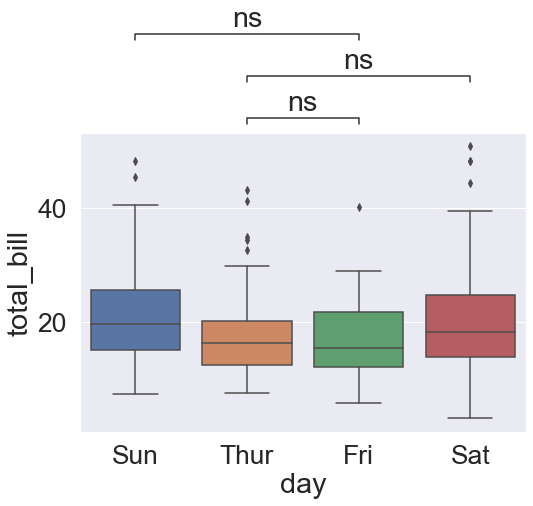

In [21]:
from statannot import add_stat_annotation
df2 = sns.load_dataset("tips")
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df2, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=df2, x=x, y=y, order=order,
                                   box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='outside', verbose=2)


In [22]:
type(df['stroke'].unique())

numpy.ndarray

In [23]:
type(df2['day'].unique())

pandas.core.arrays.categorical.Categorical

In [24]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1


In [25]:
df_heartdisease = df[df['heart_disease']==1]
df_heartdisease.count()

id                   243
gender               243
age                  243
hypertension         243
heart_disease        243
ever_married         243
work_type            243
Residence_type       243
avg_glucose_level    243
bmi                  243
smoking_status       243
stroke               243
stroke_              243
dtype: int64

In [26]:
len(df_heartdisease)

243

In [27]:
df_noheartdisease = df[df['heart_disease']==0]
df_noheartdisease.count()

id                   4666
gender               4666
age                  4666
hypertension         4666
heart_disease        4666
ever_married         4666
work_type            4666
Residence_type       4666
avg_glucose_level    4666
bmi                  4666
smoking_status       4666
stroke               4666
stroke_              4666
dtype: int64